Load the data

In [39]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Trimmed_Time_Series_Data.csv')

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI
0,1071,1986-01-01,Alberta,859000,4130.0,3778.1,7477.0,28.0,22.5,26.4
1,1072,1986-01-01,British Columbia,1132000,9185.0,11098.4,23454.0,79.5,49.2,66.3
2,1073,1986-01-01,Manitoba,392000,3327.0,4076.4,10631.0,37.7,26.9,34.7
3,1074,1986-01-01,New Brunswick,237000,2190.0,749.3,3453.0,75.1,56.1,70.5
4,1075,1986-01-01,Newfoundland and Labrador,161000,1145.0,507.7,6337.0,39.4,35.3,38.7


# EDA

In [40]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default aesthetics for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [41]:
# Display basic information
print("DataFrame Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4194 non-null   int64  
 1   REF_DATE                     4194 non-null   object 
 2   GEO                          4194 non-null   object 
 3   Number_of_Households         4194 non-null   int64  
 4   Housing completions          4194 non-null   float64
 5   Housing starts               4194 non-null   float64
 6   Housing under construction   4194 non-null   float64
 7   House only NHPI              4086 non-null   float64
 8   Land only NHPI               4086 non-null   float64
 9   Total (house and land) NHPI  4086 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 327.8+ KB
None

Summary Statistics:
        Unnamed: 0  Number_of_Households  Housing completions  Housing starts  \
count  419

## Handling Missing Values
We notice that the NHPI-related columns have some missing values. We can inspect these missing values and decide on a strategy (e.g., imputation or removal).

In [42]:
# Drop records with missing values in NHPI columns
nhpi_cols = ['House only NHPI', 'Land only NHPI', 'Total (house and land) NHPI']
df.dropna(subset=nhpi_cols, inplace=True)


In [72]:

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [47]:
# Check for null values
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
REF_DATE                       0
GEO                            0
Number_of_Households           0
Housing completions            0
Housing starts                 0
Housing under construction     0
House only NHPI                0
Land only NHPI                 0
Total (house and land) NHPI    0
dtype: int64


In [38]:
#Convert the `REF_DATE` column from object to datetime format, and extract the year to facilitate time-series analysis.

df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df['Year'] = df['REF_DATE'].dt.year


In [45]:
df.shape

(4086, 9)

## Outlier Analysis using Boxplots


Outliers detected in Housing completions: 132


,REF_DATE,GEO,Housing completions,Housing completions_zscore
3815,2021-04-01,Canada,165332.0,6.802589
170,1987-07-01,Canada,163382.0,6.715142
3842,2021-07-01,Canada,162097.0,6.657517
3734,2020-07-01,Canada,157464.0,6.449752
3950,2022-07-01,Canada,157325.0,6.443519


Outliers detected in Housing starts: 126


,REF_DATE,GEO,Housing starts,Housing starts_zscore
3815,2021-04-01,Canada,199796.0,7.332005
3950,2022-07-01,Canada,198872.0,7.295257
3923,2022-04-01,Canada,196313.0,7.193482
3869,2021-10-01,Canada,186983.0,6.822418
143,1987-04-01,Canada,186139.4,6.788867


Outliers detected in Housing under construction: 96


,REF_DATE,GEO,Housing under construction,Housing under construction_zscore
3977,2022-10-01,Canada,1076931.0,10.836703
3950,2022-07-01,Canada,1045578.0,10.506429
3923,2022-04-01,Canada,1004131.0,10.069823
3869,2021-10-01,Canada,958170.0,9.585667
3896,2022-01-01,Canada,954863.0,9.550831


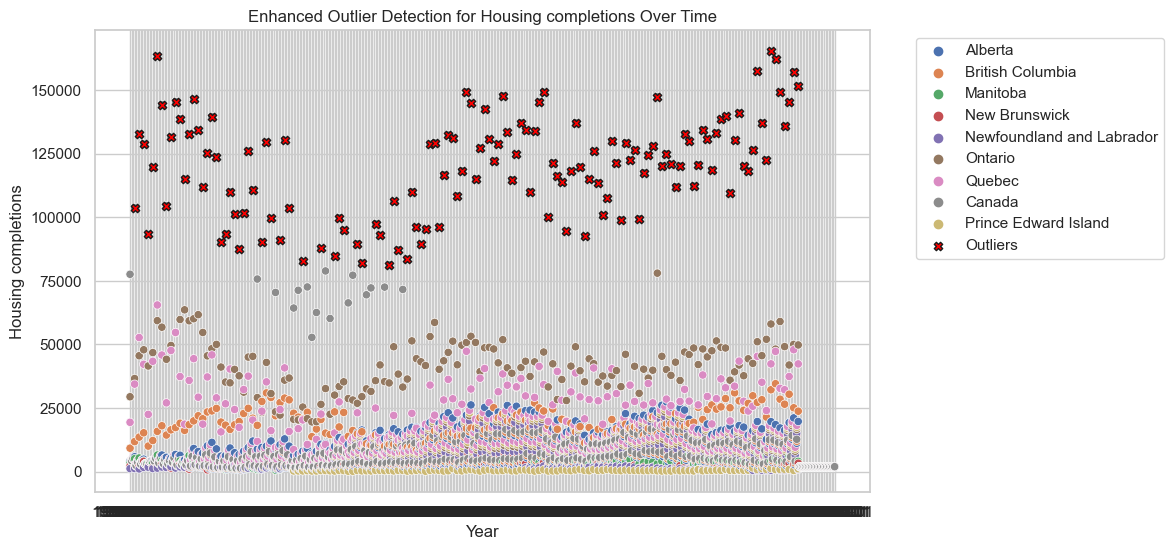

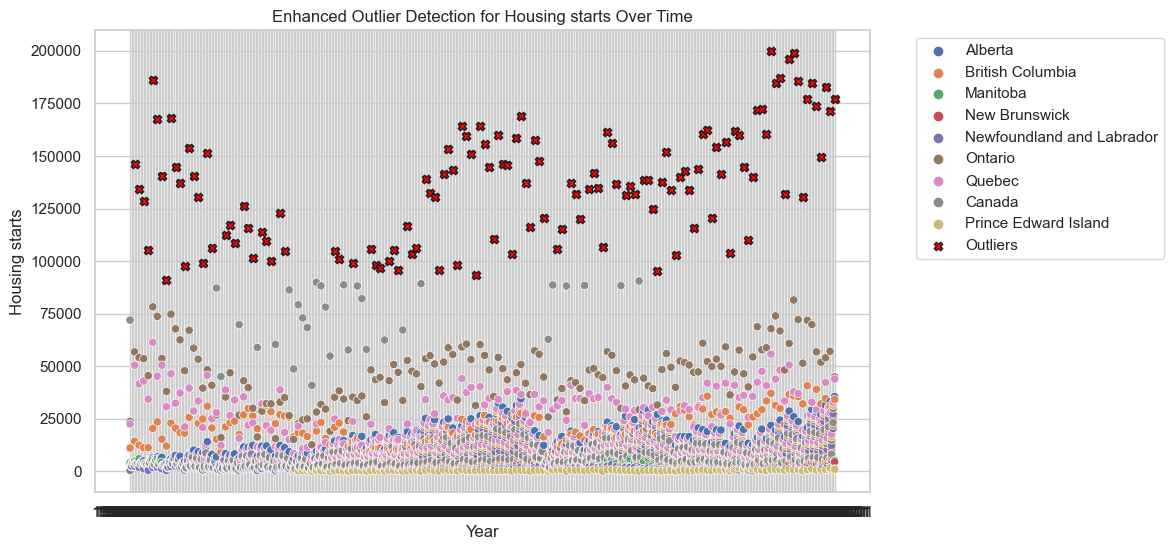

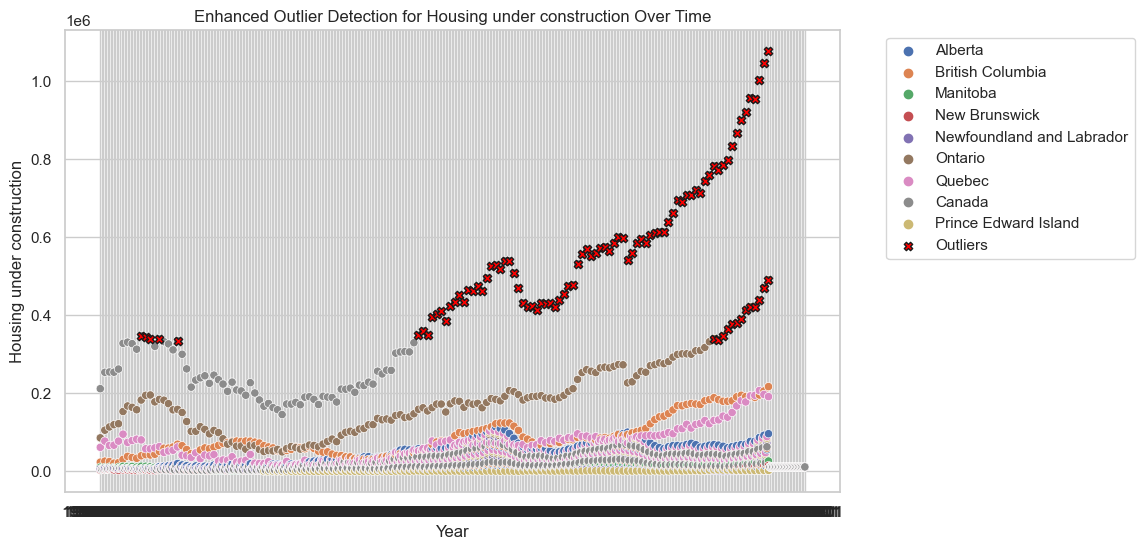

In [50]:
# Enhanced Outlier Detection using Z-score
from scipy import stats

numerical_features = ['Housing completions', 'Housing starts', 'Housing under construction']
for col in numerical_features:
    df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()
    df_outliers = df[np.abs(df[f'{col}_zscore']) > 3]
    print(f"Outliers detected in {col}: {len(df_outliers)}")
    display(df_outliers[['REF_DATE', 'GEO', col, f'{col}_zscore']].sort_values(by=f'{col}_zscore', ascending=False).head())

# Visualizing Enhanced Outliers using Scatterplot
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='REF_DATE', y=col, hue='GEO')
    outliers = df[np.abs(df[f'{col}_zscore']) > 3]
    plt.scatter(outliers['REF_DATE'], outliers[col], color='red', label='Outliers', edgecolor='k', marker='X')
    plt.title(f'Enhanced Outlier Detection for {col} Over Time')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

 **Conclusions from the Enhanced Outlier Detection Analysis**

### **1️ Housing Under Construction Over Time**
- **Trend:** Significant increase in housing under construction, especially after **2000**, with a **steep rise post-2010** and an even larger **spike post-2020**.
- **Outliers:**
  - Sharp increases post-2015 and a **massive jump post-2020**.
  - **Possible causes:** Government incentives, economic recovery, rising demand, and migration.
  - **Regions most affected:** Canada-wide, **Ontario, Quebec, and British Columbia** show the largest spikes.

 **Potential Business Concerns:**
- Supply chain constraints—delays in completions may drive price hikes.
- Labor shortages or rising material costs may impact housing affordability.

---



### **2️ Housing Starts Over Time**
- **Trend:**
  - Relatively stable until **2010**, then a **notable increase in starts**.
  - **Major spikes post-2015 and post-pandemic (2020-2022)** indicate a demand surge.
- **Outliers:**
  - **Sharp increases post-2009, post-2015, and post-2020.**
  - The **2008 Financial Crisis impact is visible** as a **drop in starts followed by a rapid recovery**.

 **Potential Business Concerns:**
- Is the **surge in housing starts driven by real demand** (population growth, migration) or **speculative investment**?
- Is there a risk of **oversupply**, or is the housing market balanced with completions?

---

### **3️ Housing Completions Over Time**
- **Trend:**
  - **Relatively steady growth from 1985 to 2005**, followed by a **sharp rise post-2010**.
  - **Post-pandemic (2020-2023) increases suggest a recovery from previous construction slowdowns**.
- **Outliers:**
  - **Drop during 2008-2010 Financial Crisis, followed by a rebound.**
  - **Post-2015 & Post-2020 Spikes:** Indicate a large number of previously started housing projects reaching completion.

 **Potential Business Concerns:**
- If completions **don’t keep up with starts**, it could indicate **construction bottlenecks** or **project delays**.
- If completions **exceed demand**, it could **lead to falling home prices and potential market corrections**.

---

### * Final Summary & Business Implications*
✔️ **Housing under construction is at an all-time high, suggesting massive development projects.**  
✔️ **Sharp spikes in starts and completions post-pandemic indicate a potential overheating market.**  
✔️ **Economic downturns (e.g., 2008) clearly affect housing trends, but markets recover quickly.**  
✔️ **Supply-demand balance needs to be monitored closely to avoid potential price crashes or shortages.**


### Time-Series Analysis (Comparing with Real-world Economic Events)

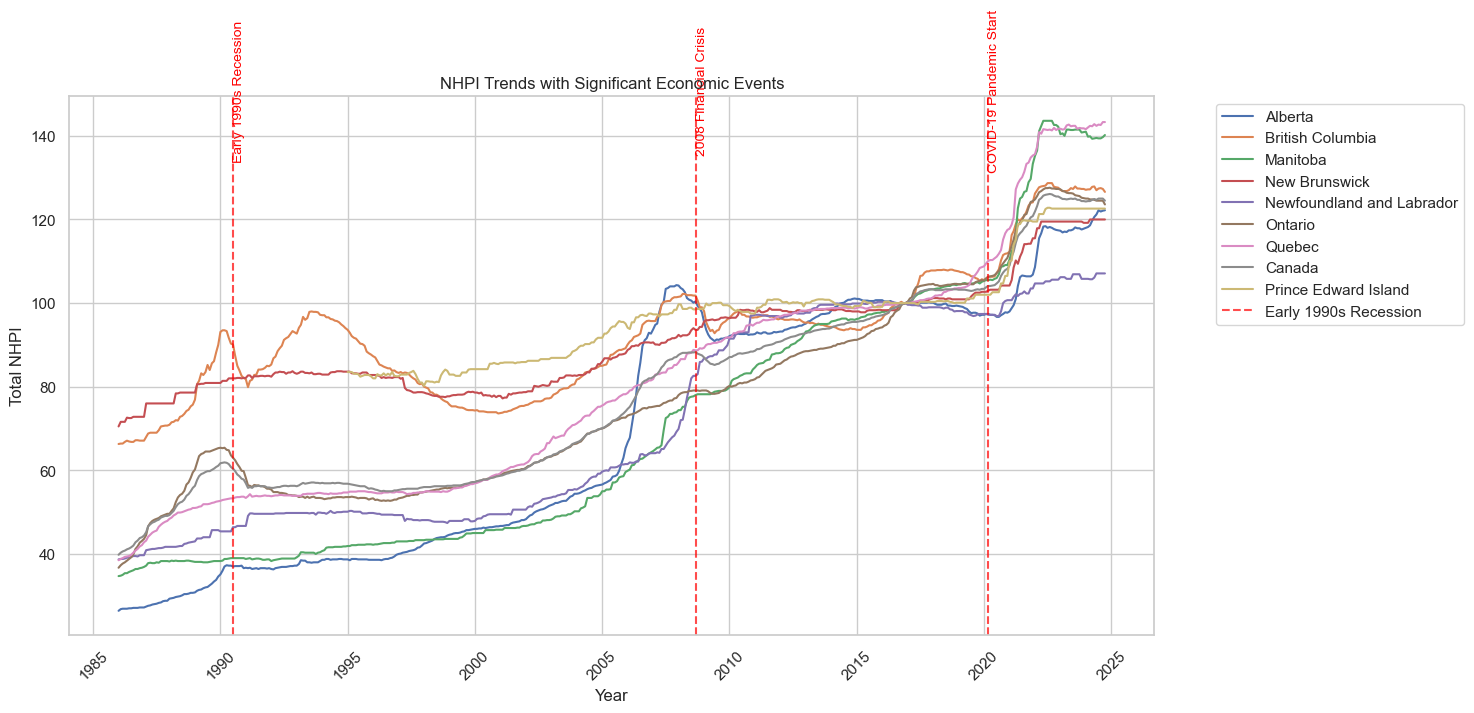

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure REF_DATE is in datetime format
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Define significant economic events
significant_dates = pd.to_datetime(['1990-07-01', '2008-09-01', '2020-03-01'])
events = ['Early 1990s Recession', '2008 Financial Crisis', 'COVID-19 Pandemic Start']

# Create the plot
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='REF_DATE', y='Total (house and land) NHPI', hue='GEO')

# Ensure x-axis is treated as datetime
plt.gca().xaxis_date()

# Mark economic events on the timeline
for i, event in enumerate(significant_dates):
    plt.axvline(event, linestyle='--', color='red', alpha=0.7, label=events[i] if i == 0 else "")
    plt.text(event, df['Total (house and land) NHPI'].max() * 1.05, events[i],
             rotation=90, verticalalignment='center', color='red', fontsize=10)

plt.title('NHPI Trends with Significant Economic Events')
plt.xlabel('Year')
plt.ylabel('Total NHPI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


### Cluster Profiling (Exploring Regional Groups)


c:\Users\schac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


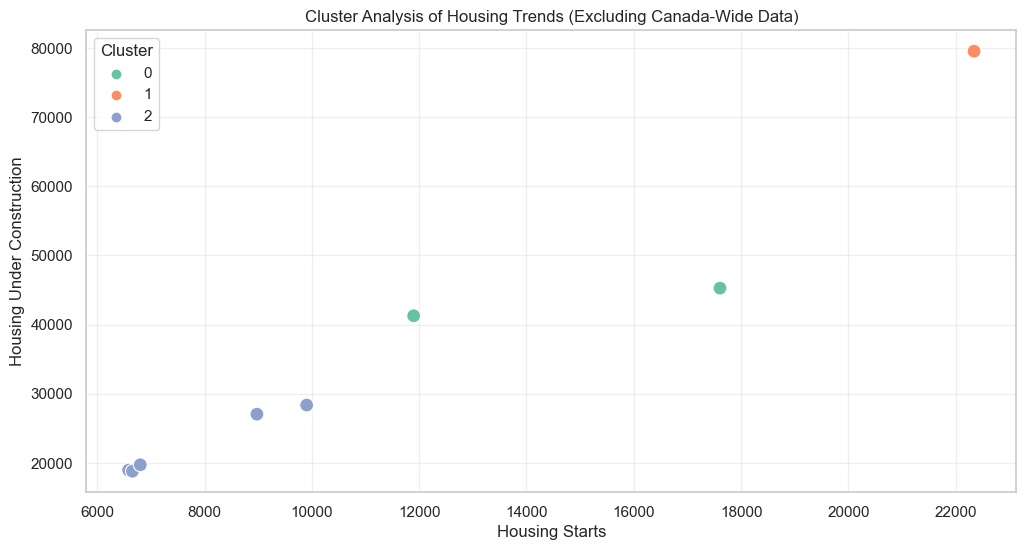

,GEO,Housing completions,Housing starts,Housing under construction,Cluster
0,Alberta,8791.059526,9903.515535,28367.132487,2
1,British Columbia,10378.477235,11897.552342,41279.187535,0
2,Manitoba,5888.237544,6584.649991,18953.799776,2
3,New Brunswick,5944.045811,6655.905253,18800.129502,2
4,Newfoundland and Labrador,6113.154506,6802.567382,19722.201717,2
5,Ontario,19582.419108,22341.791426,79555.979194,1
6,Prince Edward Island,7867.661404,8976.353898,27045.114039,2
7,Quebec,15789.728774,17606.280062,45281.192293,0


In [75]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Remove Canada-wide values
df_provincial = df[df['GEO'] != 'Canada']

# Select numerical features for clustering
cluster_features = ['Housing completions', 'Housing starts', 'Housing under construction']
df_cluster = df_provincial.groupby('GEO')[cluster_features].mean().reset_index()

# Standardize the data for better clustering performance
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[cluster_features])

# Perform KMeans Clustering (choose k=3 or based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualizing Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='Housing starts', y='Housing under construction', hue='Cluster', palette='Set2', s=100)
plt.xlabel("Housing Starts")
plt.ylabel("Housing Under Construction")
plt.title("Cluster Analysis of Housing Trends (Excluding Canada-Wide Data)")
plt.legend(title="Cluster")
plt.grid(alpha=0.3)
plt.show()

# Print clustered data
display(df_cluster)




## Grouping of Provinces Based on Housing Trends

### 1. Cluster 0: High-Activity, Mid-Level Housing Market
**Provinces:**
- British Columbia
- Quebec

**Characteristics:**
- Moderately high housing completions (~10,000-15,000) and starts (~11,000-17,000).
- Significant housing under construction (~41,000-45,000).
- These provinces show a consistent and stable housing market, with ongoing development projects keeping up with demand.

**Interpretation:**
- Balanced housing growth, meeting increasing demand steadily.
- Housing supply seems relatively well-matched to housing demand.
- Government policies, urbanization, and affordability measures likely influence this balance.

---

### 2. Cluster 1: High-Volume Housing Market (Extreme Growth)
**Provinces:**
- Ontario

**Characteristics:**
- Very high housing starts (~22,000) and completions (~19,500).
- Massive housing under construction (~79,500) – the highest among all provinces.
- Ontario appears to be the most active housing market, with strong ongoing development.

**Interpretation:**
- High demand leading to aggressive housing construction.
- The province is likely experiencing high population growth and migration, driving housing demand.
- Potential concern: If construction lags too far behind demand, it could lead to a housing shortage or affordability crisis.

---

### 3. Cluster 2: Small-Market, Low-Growth Provinces
**Provinces:**
- Alberta
- Manitoba
- New Brunswick
- Newfoundland & Labrador
- Prince Edward Island

**Characteristics:**
- Lower housing starts (6,500-9,900) and completions (5,900-8,700).
- Housing under construction (~18,000-28,000) is notably lower compared to other clusters.
- These provinces are seeing slower growth and development compared to larger markets.

**Interpretation:**
- Lower population growth or demand for housing compared to Ontario, BC, and Quebec.
- These regions might be more dependent on economic conditions (e.g., oil & gas in Alberta, seasonal housing in PEI, etc.).
- Potential issue: If demand suddenly spikes, these provinces may struggle to ramp up construction quickly.

---



Distribution and Density Plots for Deeper Insights


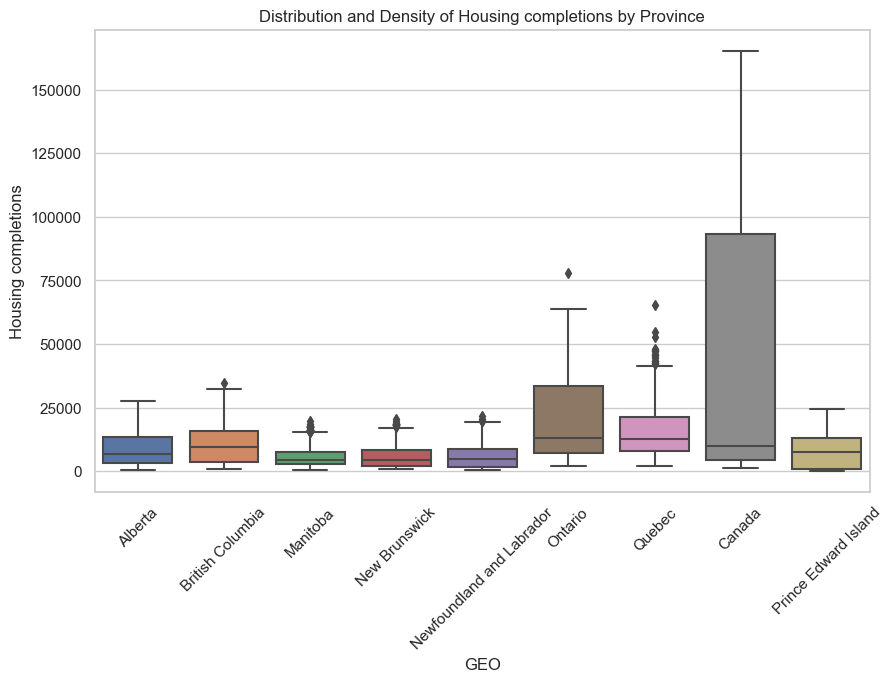

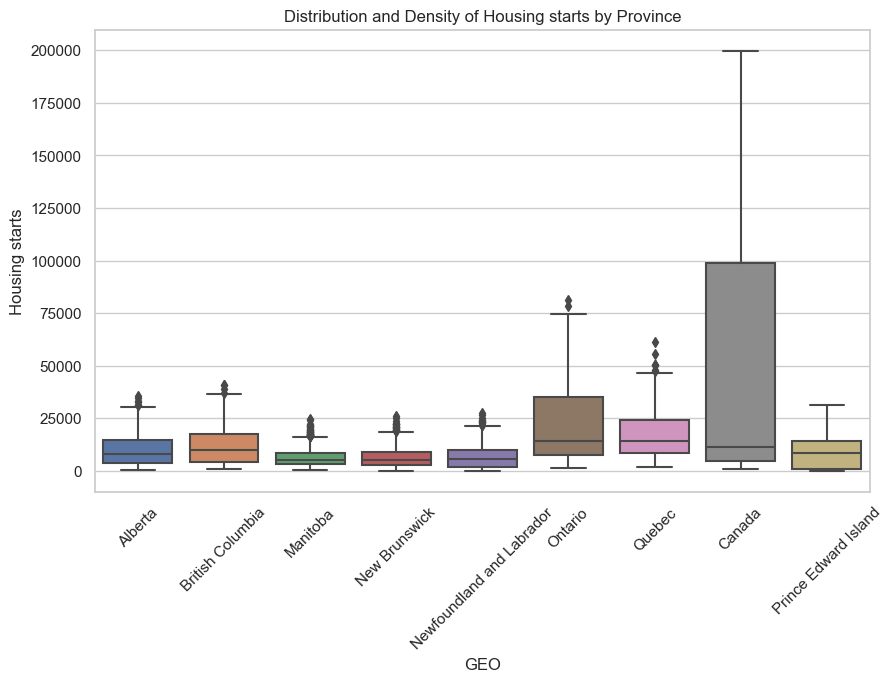

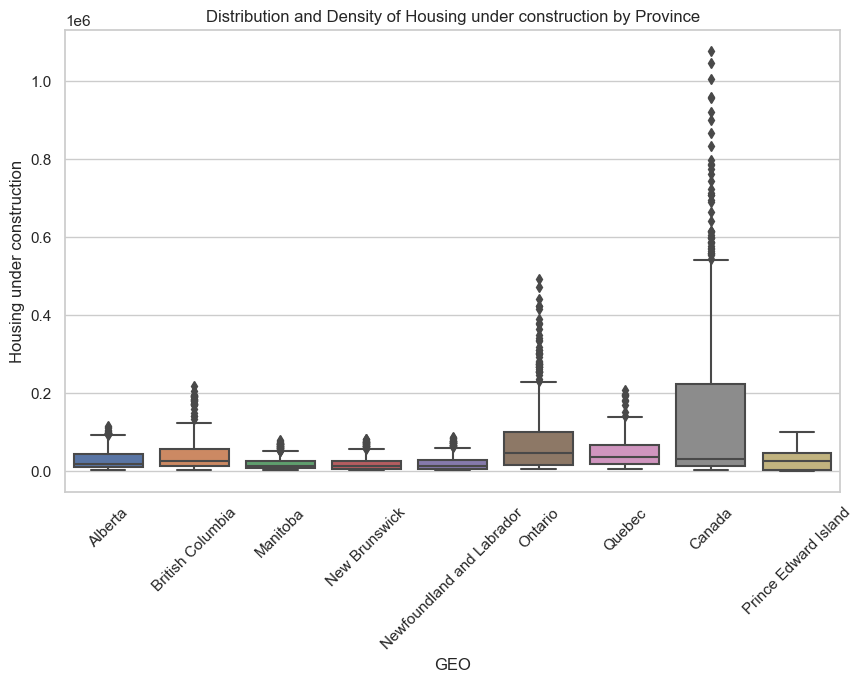

In [76]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='GEO', y=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution and Density of {col} by Province')
    plt.show()



## Analysis of Housing Trends Across Provinces

### 1. Housing Under Construction: Uneven Distribution Across Provinces
**Observations:**
- Ontario and Quebec have the widest distribution, indicating large fluctuations in the number of homes under construction.
- British Columbia also shows significant variance but is more stable than Ontario.
- Smaller provinces (Newfoundland, PEI, Manitoba, New Brunswick) have compact distributions, meaning housing projects are more consistent and predictable.

**Key Insights:**
- Provinces with wider distributions (Ontario, Quebec, BC) suggest volatile housing markets.
- High variance in under-construction homes can indicate supply-chain disruptions, seasonal construction cycles, or inconsistent demand.
- Smaller provinces have more predictable housing markets, which could mean less speculative investment and stable local demand.

---

### 2. Housing Starts: Clear Skewness and Outliers
**Observations:**
- Ontario and BC show right-skewed distributions (long tails on the right side), indicating sporadic spikes in housing starts.
- Quebec has a relatively balanced distribution, suggesting a steady, controlled housing market.
- Some extreme outliers are visible in all major provinces, indicating sudden increases in housing starts during certain periods.

**Key Insights:**
- Ontario and BC exhibit demand-driven housing growth, likely due to population growth, migration, and investment-driven construction.
- Quebec’s housing starts are more stable, reflecting controlled expansion rather than speculative growth.
- The presence of extreme outliers suggests major housing booms or government-led housing initiatives in certain periods.

---

### 3. Housing Completions: Supply Constraints or Delays
**Observations:**
- Housing completions have a narrower distribution compared to starts, suggesting projects face bottlenecks in completion.
- Ontario and Quebec show larger variance, indicating projects in these provinces often have unpredictable completion times.
- Smaller provinces have much tighter distributions, indicating steadier project completion rates.

**Key Insights:**
- The mismatch between housing starts and completions indicates possible supply chain constraints, labor shortages, or regulatory delays.
- If completions consistently lag behind starts, there’s a risk of housing shortages and price inflation.
- Smaller provinces have a more predictable and balanced supply cycle, meaning they are less prone to sudden market shifts.

---

### Final Business Takeaways
- Ontario, Quebec, and BC show the most volatile housing trends, with high variance in construction, starts, and completions.
- Outliers in housing starts suggest speculative growth or government-driven housing initiatives.
- Mismatch between housing starts and completions could signal construction slowdowns or systemic supply issues.
- Smaller provinces have a more predictable housing market, likely due to less speculative activity and stable local demand.

---


## Correlation Heatmap

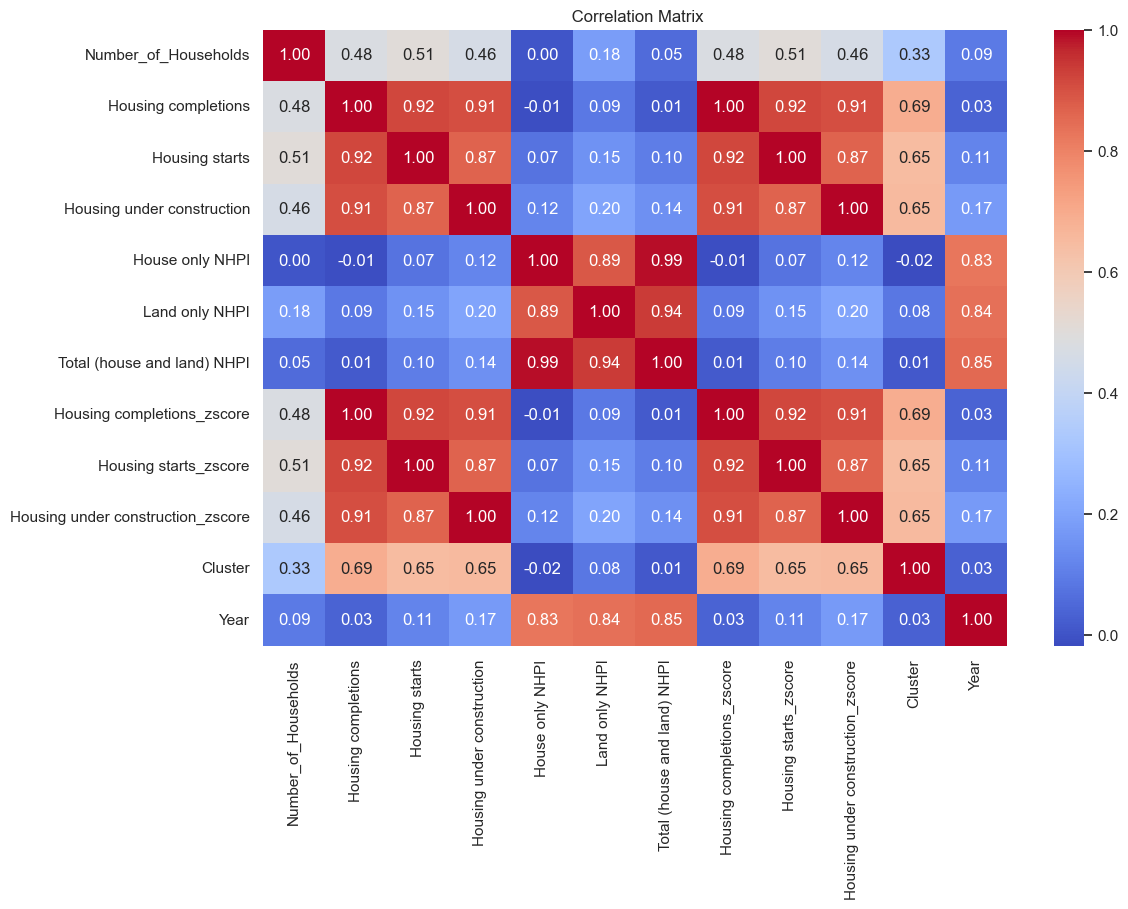

In [74]:
# ECorrelation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(' Correlation Matrix')
plt.show()


## Strong Positive Correlations
Housing completions and Housing starts (0.92)

Housing completions and Housing under construction (0.91)

Housing starts and Housing under construction (0.87)

House only NHPI (New Housing Price Index) and Land only NHPI (0.89)

House only NHPI and Total (house and land) NHPI (0.99)

Land only NHPI and Total (house and land) NHPI (0.94)


### Housing Supply vs Demand

c:\Users\schac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\schac\AppData\Local\Temp\ipykernel_36252\2044942617.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


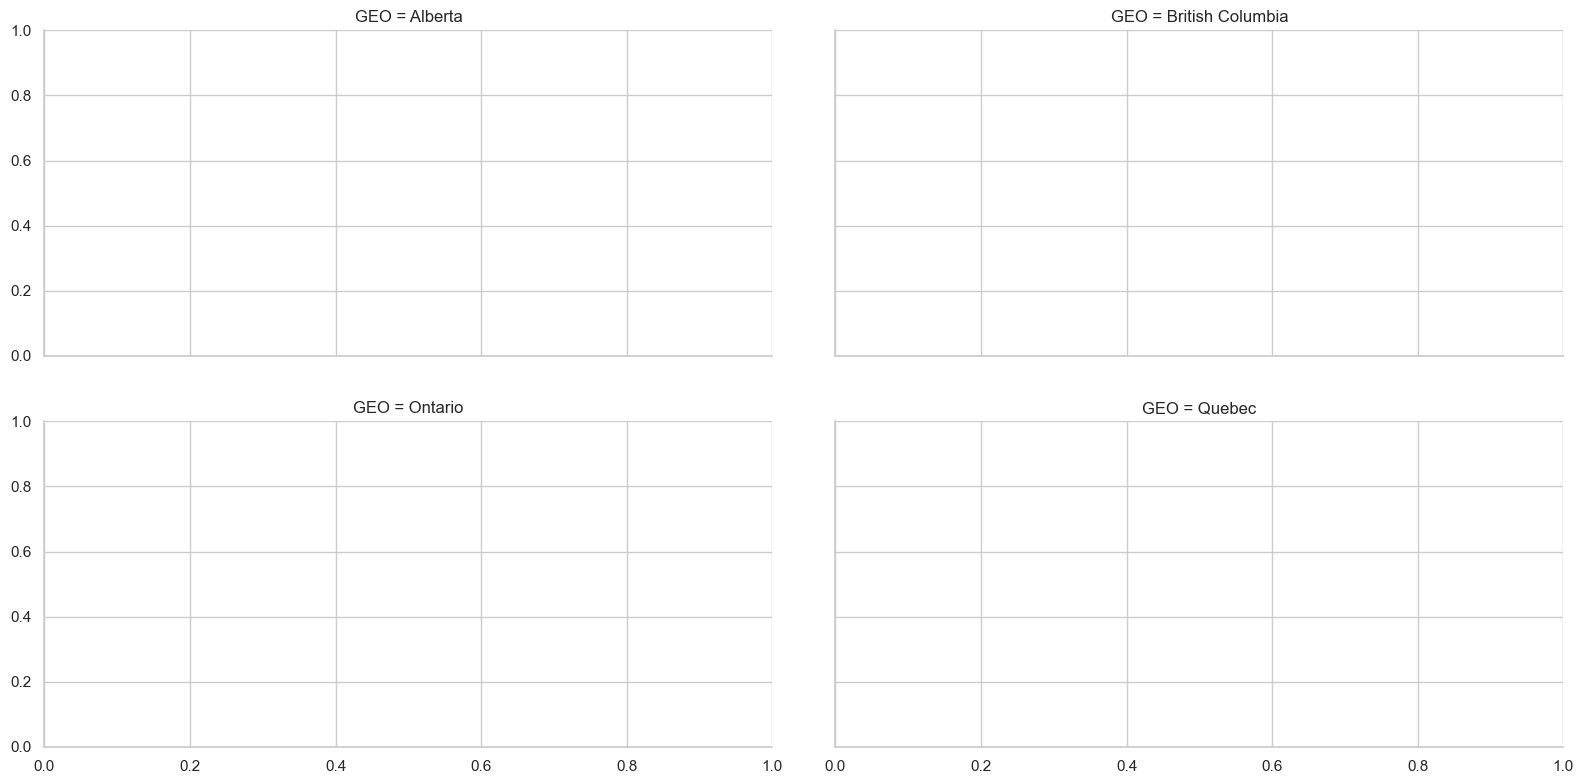

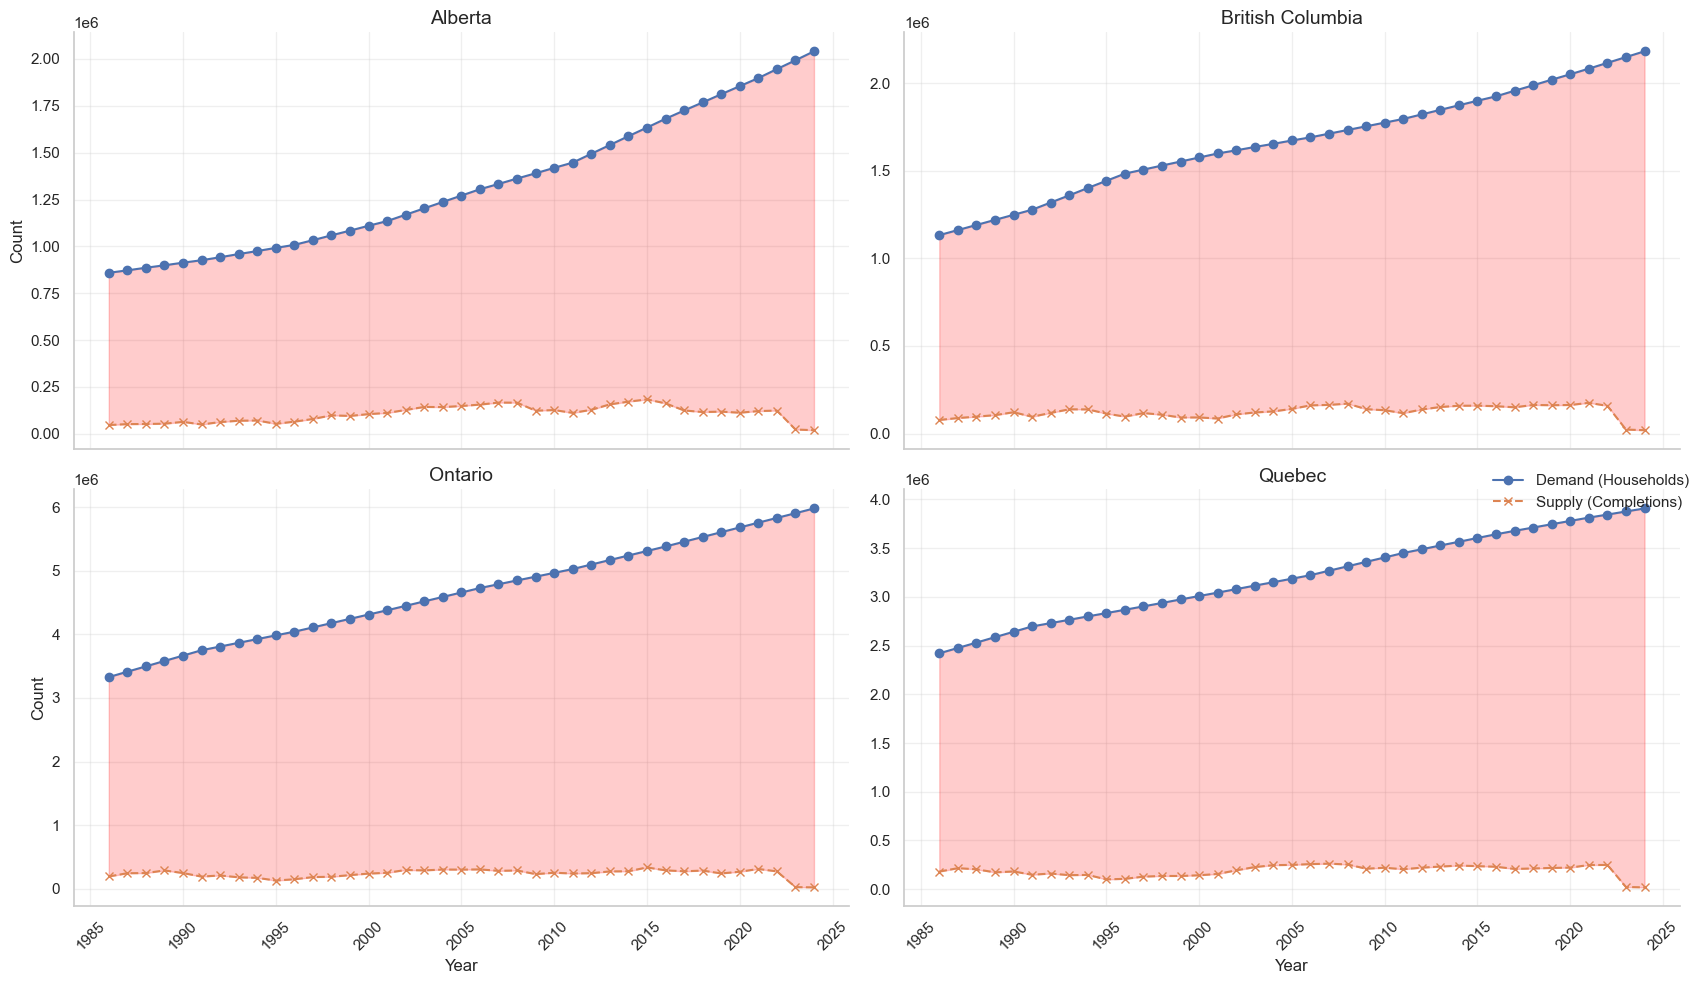

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Year extraction
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df['Year'] = df['REF_DATE'].dt.year

# Prepare aggregated data
df_provincial = df.groupby(['Year', 'GEO']).agg({
    'Number_of_Households': 'mean',
    'Housing completions': 'sum'
}).reset_index()

# Select key provinces
key_provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta']

# Plotting with facets
g = sns.FacetGrid(df_provincial[df_provincial['GEO'].isin(key_provinces)], 
                  col='GEO', col_wrap=2, height=4, aspect=2)

# Plotting each province separately
def plot_supply_demand(data, **kwargs):
    province = data['GEO'].iloc[0]
    plt.plot(data['Year'], data['Number_of_Households'], 
             marker='o', linestyle='-', label='Demand (Households)')
    plt.plot(data['Year'], data['Housing completions'], 
             marker='x', linestyle='--', label='Supply (Completions)')
    
    # Fill area between supply and demand
    plt.fill_between(data['Year'], data['Number_of_Households'], data['Housing completions'],
                     color='red' if (data['Number_of_Households'] > data['Housing completions']).any() else 'green', 
                     alpha=0.2)
    
    plt.title(province, fontsize=14)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)

# Facet Grid Plot
g = sns.FacetGrid(df_provincial[df_provincial['GEO'].isin(key_provinces)], 
                  col='GEO', col_wrap=2, height=5, aspect=1.5, sharey=False)
g.map_dataframe(plot_supply_demand)

# Adjust layout
g.add_legend()
g.set_axis_labels("Year", "Count")
plt.tight_layout()
plt.show()
